# <b> STEP 1: Import Libraries </b>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

----
----
# <b> STEP 2: Load the Data </b>

In [2]:
# Load the data
# x_train = pd.read_csv('/kaggle/input/sncf-prediction-train-2015-2022/x_train_sncf.csv')
# x_test = pd.read_csv('/kaggle/input/sncf-prediction-train-2015-2022/x_test_sncf.csv')
# y_train = pd.read_csv('/kaggle/input/sncf-prediction-train-2015-2022/y_train_sncf.csv')
x_train = pd.read_csv('data-challenge/x_train_sncf.csv')
x_test = pd.read_csv('data-challenge/x_test_sncf.csv')
y_train = pd.read_csv('data-challenge/y_train_sncf.csv')

----
----
# <b> STEP 3: Merge the training DF </b>

## <b> 3.1: Create the "Index" variable in the x_train </b>

In [3]:
x_train['index'] = x_train['date'].str.cat(x_train['station'], sep='_')
x_train.head()

,date,station,job,ferie,vacances,index
0,2015-01-01,1J7,1,1,1,2015-01-01_1J7
1,2015-01-01,O2O,1,1,1,2015-01-01_O2O
2,2015-01-01,8QR,1,1,1,2015-01-01_8QR
3,2015-01-01,UMC,1,1,1,2015-01-01_UMC
4,2015-01-01,FK3,1,1,1,2015-01-01_FK3


----
## <b> 3.2: Merge x_train and y_train in "data" </b>

In [4]:
data = pd.merge(x_train, y_train, on='index')
data = data[['date', 'station', 'index', 'job', 'ferie', 'vacances', 'y']] # reorered columns
data.head()

,date,station,index,job,ferie,vacances,y
0,2015-01-01,1J7,2015-01-01_1J7,1,1,1,7
1,2015-01-01,O2O,2015-01-01_O2O,1,1,1,0
2,2015-01-01,8QR,2015-01-01_8QR,1,1,1,9
3,2015-01-01,UMC,2015-01-01_UMC,1,1,1,9
4,2015-01-01,FK3,2015-01-01_FK3,1,1,1,28


----
----
# <b> STEP 4: Data exploration </b>

## <b> 4.1: Create a DF per station </b>

In [5]:
stations = data['station'].unique()
df_per_station = {station: data[data['station'] == station].sort_values(by='date') for station in stations}

{'1J7': 2745, 'O2O': 2832, '8QR': 2854, 'UMC': 2881, 'FK3': 2800, 'I1K': 2881, 'KY6': 2922, 'V8D': 2880, 'EK4': 2898, '357': 2866, 'O7B': 2883, 'RYX': 2891, 'TEP': 2899, 'CUF': 2882, '4UY': 2879, 'I9K': 2900, 'FA8': 2892, 'EPD': 2891, 'VML': 2668, 'GV0': 2890, 'MNO': 2754, '5KB': 2891, '6WR': 2890, 'BRZ': 2905, 'BUY': 2873, 'C3A': 2896, '276': 2873, 'IFB': 2888, '1PW': 2921, '6UW': 2908, 'RR1': 2911, 'XTG': 2920, 'JXV': 2655, 'OD3': 2868, 'YTV': 2919, 'Z2T': 2901, 'GOJ': 2875, '8X9': 2920, 'R83': 2921, 'XIG': 2907, 'CSD': 2845, '30R': 2910, 'OOY': 2821, 'JCN': 2920, 'G10': 2886, 'MM6': 2870, 'NT4': 2910, 'IOR': 2869, 'J9C': 2476, 'VI4': 2896, '8WZ': 2624, 'FYB': 2908, '5GK': 2837, 'QQJ': 2728, 'E9M': 2874, 'F77': 2873, 'JX6': 2907, 'HW6': 2779, '30I': 2756, 'CWQ': 2907, '4IM': 2745, '59A': 2756, 'BZ0': 2775, '5S5': 2742, 'MK9': 2897, 'JCW': 2873, '34L': 2833, 'EBP': 2798, 'V4D': 2894, '3KU': 2919, 'BNR': 2780, 'VGQ': 2908, 'B3W': 2901, 'HOX': 2841, '9WY': 2899, 'N7J': 2922, '4YU': 2902

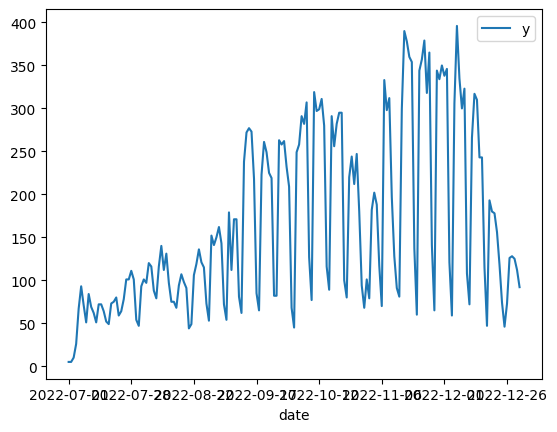

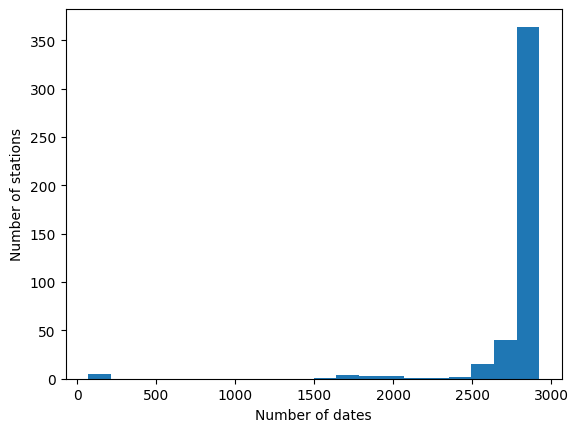

In [6]:
date_count_per_station = {station: len(df_per_station[station]) for station in df_per_station.keys()}
print(date_count_per_station)

# return the number of stations that have the same number of dates
same_date_count = {date_count: sum([1 for station in date_count_per_station.values() if station == date_count]) for date_count in date_count_per_station.values()}
print(same_date_count)

# give me the name of the stations that have less than 500 dates
stations_less_than_500 = [station for station in date_count_per_station.keys() if date_count_per_station[station] < 500]
print(stations_less_than_500)

# print the evolution of frequentation for the station 'P6E'
df_per_station['P6E'].plot(x='date', y='y', kind='line')
plt.show()



# plot the hisogram where x-axis is the number of dates and y-axis is the number of stations
plt.hist(date_count_per_station.values(), bins=20)
plt.xlabel('Number of dates')
plt.ylabel('Number of stations')
plt.show()


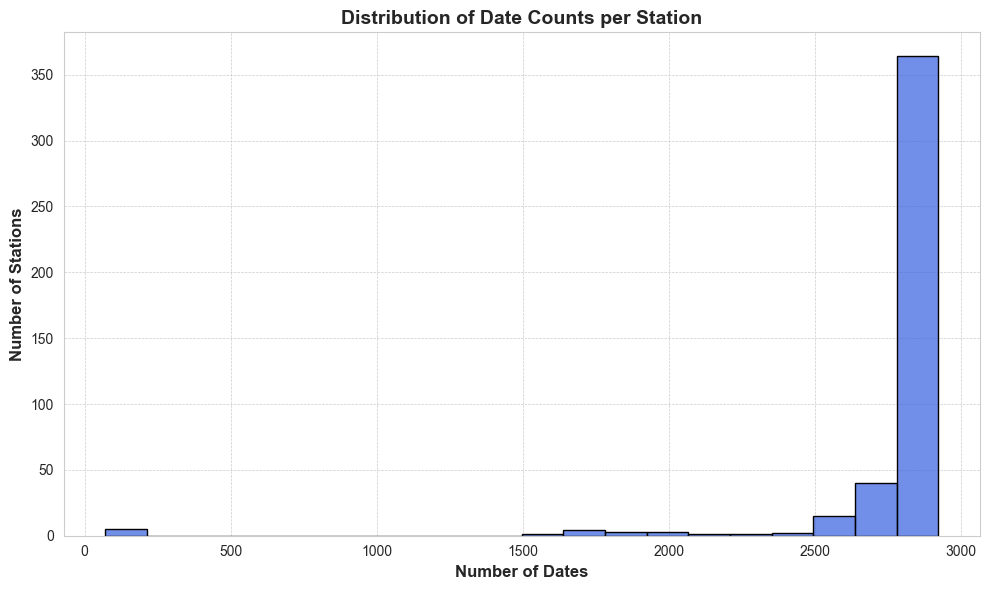

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for more sophisticated visuals
sns.set_style("whitegrid")

# Create the histogram with improved aesthetics and readability
plt.figure(figsize=(10, 6))
sns.histplot(list(date_count_per_station.values()), bins=20, color='royalblue', edgecolor='black')

# Enhancing the plot with labels, title, and aesthetic tweaks
plt.xlabel('Number of Dates', fontsize=12, fontweight='bold')
plt.ylabel('Number of Stations', fontsize=12, fontweight='bold')
plt.title('Distribution of Date Counts per Station', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


<module 'matplotlib.pyplot' from 'c:\\Users\\matte\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

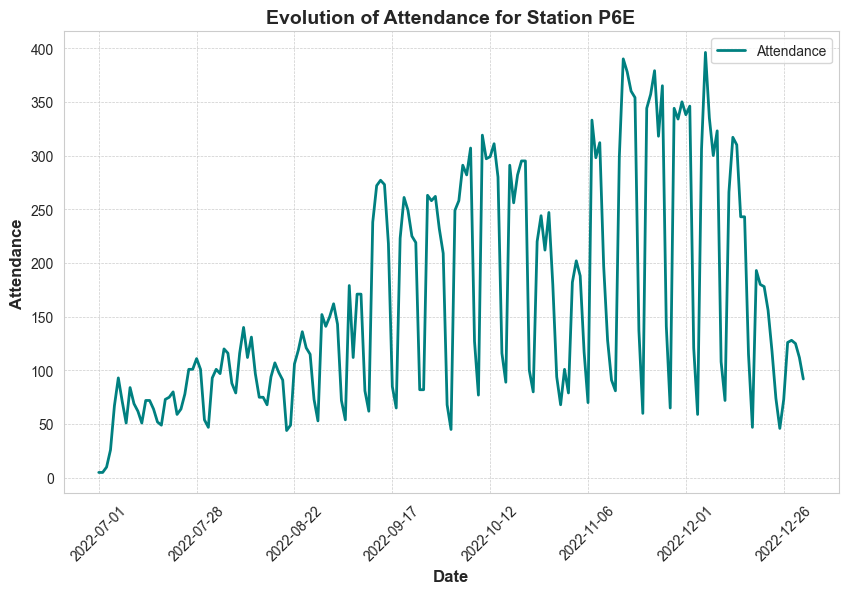

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the style of seaborn for more sophisticated visuals
sns.set_style("whitegrid")

# Plotting directly from pandas, setting figure size within the plot call
df_per_station['P6E'].plot(x='date', y='y', kind='line', figsize=(10, 6), linewidth=2, color='teal', legend=True)

# Adding a legend with a check to ensure it's only added if needed
if 'y' in df_per_station['P6E'].columns:
    plt.legend(['Attendance'])

# Enhancing the plot with descriptive labels, title, and customizing ticks for better readability
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Attendance', fontsize=12, fontweight='bold')
plt.title('Evolution of Attendance for Station P6E', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt


----
## <b> 4.2: Plot the evolution through time </b>

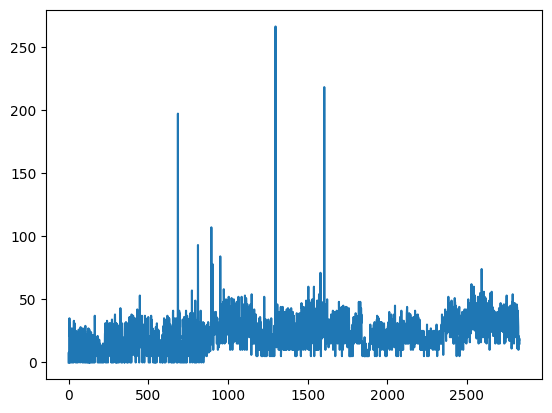

In [7]:
plt.plot(np.array(df_per_station['O2O']['y']))

In [8]:
y_array = data.groupby('station')['y'].apply(np.array).to_dict()
print(len(y_array))

439


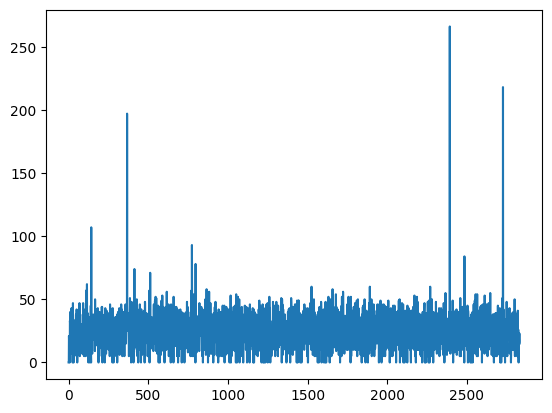

In [55]:
#y_array['O2O']
#plt.plot(y_array['O2O'])

----
----
# <b> STEP 5: Define X_train and Y_train to train a model </b>

## <b> 5.1: Create more features to "data" (e.g day_of_week_cos) </b>

In [9]:
data['date'] = pd.to_datetime(data['date'])
data['day_of_week'] = data['date'].dt.dayofweek + 1
data['day_of_week_cos'] = np.cos(2 * np.pi * (data['day_of_week'] - 1) / 7)
data['day_of_week_sin'] = np.sin(2 * np.pi * (data['day_of_week'] - 1) / 7)

data['day_of_year'] = data['date'].dt.dayofyear

X_station = data['station']
station_mapping = {station: i for i, station in enumerate(X_station.unique())}
data['station_id'] = data['station'].map(station_mapping)

print(data.head())

        date station           index  job  ferie  vacances   y  day_of_week  \
0 2015-01-01     1J7  2015-01-01_1J7    1      1         1   7            4   
1 2015-01-01     O2O  2015-01-01_O2O    1      1         1   0            4   
2 2015-01-01     8QR  2015-01-01_8QR    1      1         1   9            4   
3 2015-01-01     UMC  2015-01-01_UMC    1      1         1   9            4   
4 2015-01-01     FK3  2015-01-01_FK3    1      1         1  28            4   

   day_of_week_cos  day_of_week_sin  day_of_year  station_id  
0        -0.900969         0.433884            1           0  
1        -0.900969         0.433884            1           1  
2        -0.900969         0.433884            1           2  
3        -0.900969         0.433884            1           3  
4        -0.900969         0.433884            1           4  


----
## <b> 5.2: Define X_train </b>

In [10]:
X_train = data[['job', 'ferie', 'vacances', 'day_of_week_cos', 'day_of_week_sin']]
print(X_train.head())

   job  ferie  vacances  day_of_week_cos  day_of_week_sin
0    1      1         1        -0.900969         0.433884
1    1      1         1        -0.900969         0.433884
2    1      1         1        -0.900969         0.433884
3    1      1         1        -0.900969         0.433884
4    1      1         1        -0.900969         0.433884


----
## <b> 5.3: Define y_train </b>

In [11]:
y_train = data['y']
print(y_train.head())
print(y_train.shape)

0     7
1     0
2     9
3     9
4    28
Name: y, dtype: int64
(1229863,)


In [20]:
# Define the X_train and Y_train
X_train_test, X_val, y_train_test, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle = False)

# Reset index to align
X_train_test.reset_index(drop=True, inplace=True)
y_train_test.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

# Create a boolean mask for the filtered condition, now using the reset index
#mask = (data.loc[X_train.index, 'station'] == station_name)

# Apply the mask
#X_train_station = X_train[mask]
#y_train_station = y_train[mask]


#X_train_station = X_train[data['station'] == station_name]
#y_train_station = y_train[data['station'] == station_name]
#X_train, X_val, y_train, y_val = train_test_split(X_train_station, y_train_station, test_size=0.2, random_state=42)


----
----
# <b> STEP 6: Define the metric </b>

In [12]:
def mean_absolute_percentage_error(y_true, y_pred, eps=1e-2):
    return np.mean(np.abs((y_true+eps - y_pred+eps) / (y_true+eps))) * 100

----
----
# <b> STEP 7: Do a "basic" random forest training <b>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model for each station
idx = 1
for name_station in df_per_station.keys():
    print(f"Station{idx}")
    idx += 1
    
    X_train_station = X_train_test[data['station'] == name_station]
    y_train_station = y_train_test[data['station'] == name_station]
    X_val_station = X_val[data['station'] == name_station]
    y_val_station = y_val[data['station'] == name_station]
    
    base_model = RandomForestRegressor(n_estimators=50, random_state=42)
    #model = BaggingRegressor(base_model, n_estimators=10, random_state=42)
    base_model.fit(X_train_station, y_train_station)
    y_pred = base_model.predict(X_val_station)

    score = mean_absolute_percentage_error(y_val_station,y_pred)
    print (score)


----
----
## <b> STEP 8: Do a XGBOOST / LGBMRegressor - VALIDATION </b>

## <b> 8.1: XGBOOST </b>

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Train the model for each station
idx = 1
for name_station in df_per_station.keys():
    print(f"Station{idx}")
    idx += 1

    X_train_station = X_train_test[data['station'] == name_station]
    y_train_station = y_train_test[data['station'] == name_station]
    X_val_station = X_val[data['station'] == name_station]
    y_val_station = y_val[data['station'] == name_station]
    
    # Initialize the XGBoost regressor
    model = XGBRegressor(n_estimators=50, random_state=42)
    
    # Fit the model on the training data
    model.fit(X_train_station, y_train_station)
    
    # Predict on the validation set
    y_pred = model.predict(X_val_station)

    # Calculate the score
    score = mean_absolute_percentage_error(y_val_station, y_pred)
    print(score)


----
## <b> 8.2: LGBMREGRESSOR </b>

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# Train the model for each station
idx = 1
for name_station in df_per_station.keys():
    print(f"Station{idx}")
    idx += 1

    X_train_station = X_train_test[data['station'] == name_station]
    y_train_station = y_train_test[data['station'] == name_station]
    X_val_station = X_val[data['station'] == name_station]
    y_val_station = y_val[data['station'] == name_station]
    
    # Initialize the XGBoost regressor
    model = LGBMRegressor(n_estimators=50, random_state=42)
    
    # Fit the model on the training data
    model.fit(X_train_station, y_train_station)
    
    # Predict on the validation set
    y_pred = model.predict(X_val_station)

    # Calculate the score
    score = mean_absolute_percentage_error(y_val_station, y_pred)
    print(score)


----
----
# <b> STEP 9: Define X_TEST and Y_TEST </b>

## <b> 9.1: Define X_test </b>

In [15]:
x_test['date'] = pd.to_datetime(x_test['date'])
x_test['day_of_week'] = x_test['date'].dt.dayofweek + 1
print(x_test.head())
x_test['day_of_week_cos'] = np.cos(2 * np.pi * (x_test['day_of_week'] - 1) / 7)
x_test['day_of_week_sin'] = np.sin(2 * np.pi * (x_test['day_of_week'] - 1) / 7)
X_test = x_test[['job', 'ferie', 'vacances', 'day_of_week_cos', 'day_of_week_sin']]

            index       date station  job  ferie  vacances  day_of_week
0  2023-01-01_1J7 2023-01-01     1J7    0      1         1            7
1  2023-01-01_O2O 2023-01-01     O2O    0      1         1            7
2  2023-01-01_8QR 2023-01-01     8QR    0      1         1            7
3  2023-01-01_L58 2023-01-01     L58    0      1         1            7
4  2023-01-01_UMC 2023-01-01     UMC    0      1         1            7


----
## <b> 9.2: Define y_test </b>

In [13]:
def create_y_test(x_test):
    # Create an empty y_test dataframe
    y_test = pd.DataFrame()
    # Convert 'date' column to string type
    x_test['date'] = x_test['date'].astype(str)
    # First column name is 'index'
    y_test['index'] = x_test['date'].str.cat(x_test['station'], sep='_')
    # Second column name is 'y'
    y_test['y'] = 0
    print(y_test.head())
    return y_test

In [14]:
y_test = create_y_test(x_test)

            index  y
0  2023-01-01_1J7  0
1  2023-01-01_O2O  0
2  2023-01-01_8QR  0
3  2023-01-01_L58  0
4  2023-01-01_UMC  0


----
----
# <b> STEP 10: Prophet FACEBOOK </b>

In [27]:
!pip install pystan


In [28]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [42 lines of output]
      /tmp/pip-install-l6yybcgi/fbprophet_6cb811f6f11c4c4a932c3d7dbbfa1da5/setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        from pkg_resources import (
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-l6yybcgi/fbprophet_6cb811f6f11c4c4a932c3d7dbbfa1da5/setup.py", line 122, in <module>
          setup(
        File "/opt/conda/lib/python3.10/site-packages/setuptools/__init__.py", line 103, in setup
          return distutils.co

In [ ]:
entry = data[['date','y']]
print(entry.head())

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    

# Train the model for each station
idx = 1
for name_station in y_array:
    print(f"station:{idx}/{len(y_array)}")
    idx += 1
    
    X_train_station = entry[data['station'] == name_station].values.astype(float)
    m = Prophet()
    m.fit(X_train_station)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(periods=365)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    
    # Update the y_test dataframe with the predictions
    y_test.loc[y_test['index'].str.contains(name_station), 'y'] = forecast[['yhat']]

# Save y_test dataframe to a csv file
y_test.to_csv('/kaggle/working/y_deep_Kaggle_VCOMPLEX.csv', index=False)

    

In [ ]:
from fbprophet import Prophet

# Initialize a list to store metrics or any other performance measures if needed
metrics = []

# Assume that 'ds' is the datetime column and 'y' is the target variable in your dataset
# Also, assume that your dataset includes a 'station' column to filter by station names

idx = 1
for name_station in y_array:  # Assuming y_array is a list of unique station names
    print(f"station:{idx}/{len(y_array)}")
    idx += 1
    
    # Select data for the current station
    train_data = data[data['station'] == name_station][['ds', 'y']]  # Training data
    test_data = x_test[x_test['station'] == name_station][['ds']]  # Test data dates
    
    # Initialize and configure the Prophet model
    # Note: You might want to tune these parameters
    model = Prophet(
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=True,
        seasonality_mode='additive'
    )
    
    # Fit the model
    model.fit(train_data)
    
    # Make a future dataframe for predictions
    future = model.make_future_dataframe(periods=len(test_data), freq='D')  # 'D' for daily frequency, adjust as necessary
    
    # Predict
    forecast = model.predict(future)
    
    # Extract the predicted values for the test set dates
    predictions = forecast.loc[forecast['ds'].isin(test_data['ds']), 'yhat'].values
    
    # Assuming y_test is structured to match the test data and includes a 'station' and 'ds' column
    y_test.loc[(y_test['station'] == name_station) & (y_test['ds'].isin(test_data['ds'])), 'y'] = predictions

    # Optional: Calculate and store performance metrics, e.g., RMSE
    # You'd need the actual values for the test set to calculate RMSE or other metrics

# Save the updated y_test dataframe with predictions
y_test.to_csv('/kaggle/working/y_prophet_Kaggle_BI.csv', index=False)


In [ ]:
from fbprophet import Prophet
import pandas as pd

# Assuming entry and y_test are defined correctly and y_array contains the list of stations
# Ensure y_test is prepared to receive the forecast values

for name_station in y_array:
    print(f"Processing station {name_station}")

    # Assuming 'entry' DataFrame has columns ['ds', 'y'] for Prophet and a 'station' column to filter by station name
    X_train_station = entry[entry['station'] == name_station]
    
    m = Prophet()
    m.fit(X_train_station)
    
    # Make future dataframe for 365 days
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)

    # Extract the last 365 'yhat' values
    predicted_values = forecast['yhat'][-365:]

    # Find the indexes in y_test that correspond to this station's last 365 days
    # This assumes y_test has a 'station' column and an 'index' column to identify rows uniquely
    indexes_to_update = y_test[(y_test['station'] == name_station)].tail(365).index
    
    # Update y_test only for the last 365 values for the current station
    y_test.loc[indexes_to_update, 'y'] = predicted_values.values

# Save y_test dataframe to a csv file
y_test.to_csv('/kaggle/working/y_deep_Kaggle_PROPHET.csv', index=False)


TEDDY MARKDOWN

In [26]:
from fbprophet import Prophet

# Initialize a list to store metrics or any other performance measures if needed
metrics = []

idx = 1
for name_station in y_array:  # Assuming y_array is a list of unique station names
    print(f"station:{idx}/{len(y_array)}")
    idx += 1
    
    # Select data for the current station
    train_data = data[data['station'] == name_station]
    test_data = x_test[x_test['station'] == name_station]
    
    # Prepare the data for Prophet
    train_data_for_prophet = train_data[['ds', 'y', 'ferie', 'job', 'vacances']]  # Assuming 'ds' is the datetime column and 'y' is the target variable
    test_data_for_prophet = test_data[['ds', 'ferie', 'job', 'vacances']]
    
    # Initialize the Prophet model
    model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True, seasonality_mode='additive')
    
    # Add extra regressors
    model.add_regressor('ferie')
    model.add_regressor('job')
    model.add_regressor('vacances')
    
    # Fit the model
    model.fit(train_data_for_prophet)
    
    # Make a future dataframe for predictions
    future = model.make_future_dataframe(periods=len(test_data), freq='D')  # Adjust 'D' as necessary for your data's frequency
    
    # Merge the future dataframe with the extra regressors from the test dataset
    future = future.merge(test_data_for_prophet, on='ds', how='left')
    
    # Predict
    forecast = model.predict(future)
    
    # Extract the predicted values for the test set dates
    predictions = forecast.loc[forecast['ds'].isin(test_data_for_prophet['ds']), 'yhat'].values
    
    # Update y_test dataframe with the predictions
    y_test.loc[(y_test['station'] == name_station) & (y_test['ds'].isin(test_data_for_prophet['ds'])), 'y'] = predictions

    # Optional: Calculate and store performance metrics

# Save the updated y_test dataframe with predictions
y_test.to_csv('/kaggle/working/y_prophet_with_regressors_Kaggle_BI.csv', index=False)


ModuleNotFoundError: No module named 'fbprophet'

In [16]:
import pandas as pd

# List of CSV files to load
csv_files = ['submit-files/y_deep.csv', 'submit-files/y_XGBOOST.csv', 'submit-files/y_elasticnet_Kaggle_BI.csv', 'submit-files/y_AdaBoost.csv', 'submit-files/y_LightGBM.csv']

# Create an empty DataFrame to store the data
merged_df = pd.DataFrame()

# Load each CSV file and append it to the merged DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    merged_df = merged_df.append(df)

# Calculate the mean of the 'y' column
mean_df = merged_df.groupby('index')['y'].mean().reset_index()

# Save the mean DataFrame to a new CSV file
mean_df.to_csv('ensemblelearning.csv', index=False)


C:\Users\matte\AppData\Local\Temp\ipykernel_20864\3884631612.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df)
C:\Users\matte\AppData\Local\Temp\ipykernel_20864\3884631612.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df)
C:\Users\matte\AppData\Local\Temp\ipykernel_20864\3884631612.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df)
C:\Users\matte\AppData\Local\Temp\ipykernel_20864\3884631612.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df)
C:\Users\matte\AppData\Local\Temp\ipykernel_20864\388463

----
----
# <b> STEP 11: BOOSTING - ON TEST </b>

In [94]:
import xgboost as xgb

# Initialize lists to store metrics or any other performance measures if needed
metrics = []

# Train the model for each station
idx = 1
for name_station in y_array:  # Assuming y_array is a list of unique station names
    print(f"station:{idx}/{len(y_array)}")
    idx += 1
    
    # Select data for the current station
    X_train_station = X_train[data['station'] == name_station]
    y_train_station = y_train[data['station'] == name_station]
    X_test_station = X_test[x_test['station'] == name_station]
    
    # Create DMatrix for XGBoost
    dtrain_station = xgb.DMatrix(X_train_station, label=y_train_station)
    dtest_station = xgb.DMatrix(X_test_station)
    
    # Define XGBoost model parameters
    params = {
        'max_depth': 15,
        'eta': 0.01,
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse'  # or another relevant metric depending on your task
    }
    num_rounds = 140
    
    # Train the model
    bst = xgb.train(params, dtrain_station, num_rounds)
    
    # Predict
    predictions = bst.predict(dtest_station)
    
    # Update the y_test dataframe with the predictions
    # y_test.loc[y_test['station'] == name_station, 'y'] = predictions
    y_test.loc[y_test['index'].str.contains(name_station), 'y'] = predictions

# Save y_test dataframe to a csv file
y_test.to_csv('/kaggle/working/y_boosted_Kaggle_BI.csv', index=False)


station:1/439
station:2/439
station:3/439
station:4/439
station:5/439
station:6/439
station:7/439
station:8/439
station:9/439
station:10/439
station:11/439
station:12/439
station:13/439
station:14/439
station:15/439
station:16/439
station:17/439
station:18/439
station:19/439
station:20/439
station:21/439
station:22/439
station:23/439
station:24/439
station:25/439
station:26/439
station:27/439
station:28/439
station:29/439
station:30/439
station:31/439
station:32/439
station:33/439
station:34/439
station:35/439
station:36/439
station:37/439
station:38/439
station:39/439
station:40/439
station:41/439
station:42/439
station:43/439
station:44/439
station:45/439
station:46/439
station:47/439
station:48/439
station:49/439
station:50/439
station:51/439
station:52/439
station:53/439
station:54/439
station:55/439
station:56/439
station:57/439
station:58/439
station:59/439
station:60/439
station:61/439
station:62/439
station:63/439
station:64/439
station:65/439
station:66/439
station:67/439
stat

In [84]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np


# Placeholder for storing final predictions
final_predictions = pd.DataFrame()

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Cross-validation strategy

params = {
    'max_depth': 5,  # to be tuned
    'eta': 0.1,  # to be tuned
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'  # or another relevant metric
}

for name_station in np.unique(data['station']):
    print(f"Training for station: {name_station}")
    
    # Selecting data for the current station
    X_train_station = X_train[data['station'] == name_station]
    y_train_station = y_train[data['station'] == name_station]
    X_test_station = X_test[data['station'] == name_station]
    
    station_predictions = []  # To store predictions for each fold
    
    for train_index, val_index in kf.split(X_train_station):
        X_train_cv, X_val_cv = X_train_station.iloc[train_index], X_train_station.iloc[val_index]
        y_train_cv, y_val_cv = y_train_station.iloc[train_index], y_train_station.iloc[val_index]
        
        dtrain = xgb.DMatrix(X_train_cv, label=y_train_cv)
        dval = xgb.DMatrix(X_val_cv, label=y_val_cv)
        watchlist = [(dtrain, 'train'), (dval, 'eval')]
        
        bst = xgb.train(params, dtrain, num_boost_round=1000, evals=watchlist, early_stopping_rounds=10, verbose_eval=False)
        
        dtest_station = xgb.DMatrix(X_test_station)
        preds = bst.predict(dtest_station, ntree_limit=bst.best_ntree_limit)
        station_predictions.append(preds)
    
    # Averaging predictions over folds
    final_prediction = np.mean(station_predictions, axis=0)
    temp_df = pd.DataFrame({f'{name_station}_predictions': final_prediction})
    final_predictions = pd.concat([final_predictions, temp_df], axis=1)
    
    y_test.loc[y_test['index'].str.contains(name_station), 'y'] = final_predictions

# Save y_test dataframe to a csv file
y_test.to_csv('/kaggle/working/y_boosted_Kaggle_BI_CROSS.csv', index=False)



Training for station: 003


/tmp/ipykernel_34/749382512.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_station = X_test[data['station'] == name_station]


AttributeError: 'Booster' object has no attribute 'best_ntree_limit'

## <b> ElasticNet Linear Regression </b>

In [23]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize lists to store metrics or any other performance measures if needed
metrics = []

# Train the model for each station
idx = 1
for name_station in y_array:  # Assuming y_array is a list of unique station names
    print(f"station:{idx}/{len(y_array)}")
    idx += 1
    
    # Select data for the current station
    X_train_station = X_train[data['station'] == name_station]
    y_train_station = y_train[data['station'] == name_station]
    X_test_station = X_test[x_test['station'] == name_station]
    
    # Define ElasticNet model parameters
    # Note: alpha and l1_ratio should be tuned using, for example, cross-validation
    alpha = 0.1  # Regularization strength
    l1_ratio = 0.5  # Mixing parameter, with 0<= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1
    
    # Initialize the ElasticNet model
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000, tol=0.01)
    
    # Train the model
    model.fit(X_train_station, y_train_station)
    
    # Predict
    predictions = model.predict(X_test_station)
    
    # Compute and store the RMSE for this station
    rmse = np.sqrt(mean_squared_error(y_test[y_test['index'].str.contains(name_station)]['y'], predictions))
    metrics.append(rmse)
    
    # Update the y_test dataframe with the predictions
    y_test.loc[y_test['index'].str.contains(name_station), 'y'] = predictions

# Print average RMSE across all stations (or other metrics as needed)
average_rmse = np.mean(metrics)
print(f"Average RMSE across all stations: {average_rmse}")

# Save y_test dataframe to a csv file
y_test.to_csv('/kaggle/working/y_elasticnet_Kaggle_BI.csv', index=False)


station:1/439


/tmp/ipykernel_34/2716032133.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 27.09065261 417.88572057 336.23889363 177.07154382 202.2962997
 400.50890674 267.61736999 400.50890674 318.8620798  174.05854984
 313.43285226 356.03433293 395.0796792  356.03433293 274.38750599
 349.26419693 336.23889363 177.07154382 417.88572057 177.07154382
  95.42471688 395.0796792  318.8620798  174.05854984 400.50890674
 174.05854984  92.41172291 417.88572057 274.38750599 349.26419693
 356.03433293 349.26419693 349.26419693 400.50890674  95.42471688
 395.0796792  177.07154382 395.0796792  395.0796792  356.03433293
  92.41172291 417.88572057 174.05854984 417.88572057 417.88572057
 177.07154382 202.2962997  400.50890674 349.26419693 400.50890674
 400.50890674 174.05854984 395.0796792  356.03433293 395.0796792
 356.03433293 356.03433293 283.94312663 417.88572057 177.07154382
 417.88572057 177.07154382 177.07154382 395.0

station:2/439
station:3/439
station:4/439
station:5/439
station:6/439
station:7/439
station:8/439
station:9/439
station:10/439
station:11/439
station:12/439
station:13/439
station:14/439
station:15/439
station:16/439
station:17/439
station:18/439
station:19/439
station:20/439
station:21/439
station:22/439
station:23/439
station:24/439
station:25/439
station:26/439
station:27/439
station:28/439
station:29/439
station:30/439
station:31/439
station:32/439
station:33/439
station:34/439
station:35/439
station:36/439
station:37/439
station:38/439
station:39/439
station:40/439
station:41/439
station:42/439
station:43/439
station:44/439
station:45/439
station:46/439
station:47/439
station:48/439
station:49/439
station:50/439
station:51/439
station:52/439
station:53/439
station:54/439
station:55/439
station:56/439
station:57/439
station:58/439
station:59/439
station:60/439
station:61/439
station:62/439
station:63/439
station:64/439
station:65/439
station:66/439
station:67/439
station:68/439
sta

----
----
# <b> STEP 11: Now let's do Deep Learning ! </b>

In [83]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


----
## <b> 1/ Simple LSTM + FC </b>
## <b> 2/ Bidirectional LSTM </b>
## <b> 3/ Complex LSTM + FC </b>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define the neural network architecture
class TimeSeriesRegression(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(TimeSeriesRegression, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        output, _ = self.lstm(x)
        output = self.fc(output)
        
        return output
    

class EvolvedTimeSeriesRegression(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout_rate=0.1):
        super(EvolvedTimeSeriesRegression, self).__init__()
        # Bidirectional LSTM
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True, dropout=dropout_rate if num_layers > 1 else 0, bidirectional=True)
        self.dropout = nn.Dropout(dropout_rate)
        
        # More complex FC network with Batch Normalization
        self.fc1 = nn.Linear(hidden_size * 2, hidden_size)  # Adjust for bidirectional output
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc3 = nn.Linear(hidden_size // 2, 1)

    def forward(self, x):
        output, _ = self.lstm(x)
        # Assuming the output shape is [batch_size, seq_length, num_directions*hidden_size]
        # Apply dropout
        output = self.dropout(output)
        # Select the output of the last time step
        # output = output[:, -1, :]
        output = F.relu(self.fc1(output))
        output = self.dropout(F.relu(self.fc2(output)))
        output = self.fc3(output)
        
        return output
    
# Define the neural network architecture
class VComplexTimeSeriesRegression(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(VComplexTimeSeriesRegression, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.lstm3 = nn.LSTM(hidden_size,hidden_size, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        output, _ = self.lstm1(x)
        output, _ = self.lstm2(output)
        output, _ = self.lstm3(output)
        output = self.fc1(output)
        output = self.fc2(output)
        output = self.fc3(output)
        return output


# Define the neural network architecture
class ComplexTimeSeriesRegression(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(ComplexTimeSeriesRegression, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.lstm3 = nn.LSTM(hidden_size, 2*hidden_size, num_layers, batch_first=True)
        self.lstm4 = nn.LSTM(2*hidden_size, hidden_size, num_layers, batch_first=True)

        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 2*hidden_size)
        self.fc3 = nn.Linear(2*hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        output, _ = self.lstm1(x)
        output, _ = self.lstm2(output)
        output, _ = self.lstm3(output)
        output, _ = self.lstm4(output)

        output = self.fc1(output)
        output = self.fc2(output)
        output = self.fc3(output)
        output = self.fc4(output)
        
        return output

# Define the loss function and optimizer
criterion = nn.MSELoss()
learning_rate = 0.001
num_epochs = 130

# Create an instance of the model
hidden_size = 128
num_layers = 2


# Train the model for each station
idx = 1
for name_station in y_array:
    print(f"station:{idx}/{len(y_array)}")
    idx += 1
    
    X_train_station = X_train[data['station'] == name_station]
    y_train_station = y_train[data['station'] == name_station]
    X_test_station = X_test[x_test['station'] == name_station]

    # Convert the data to PyTorch tensors
    X_train_tensor_station = torch.tensor(X_train_station.values,dtype=torch.float32)

    input_size = X_train_tensor_station.shape[0]

    X_train_tensor_station = torch.tensor(X_train_station.values,dtype=torch.float32).to(device)
    #X_train_tensor_station = X_train_tensor_station.t()
    print(X_train_tensor_station.shape)
    y_train_tensor_station = torch.tensor(y_train_station.values,dtype=torch.float32).to(device)
    X_test_tensor_station = torch.tensor(X_test_station.values,dtype=torch.float32).to(device)

    input_size = X_train_tensor_station.shape[0]
    # model = ComplexTimeSeriesRegression(input_size, hidden_size, num_layers)
    # model = TimeSeriesRegression(input_size, hidden_size, num_layers)
    model = VComplexTimeSeriesRegression(input_size, hidden_size, num_layers).to(device)
    
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X_train_tensor_station)
        loss = criterion(outputs, y_train_tensor_station.unsqueeze(1))
        loss.backward()
        optimizer.step()

    # Evaluate the model
    with torch.no_grad():
        outputs = model(X_test_tensor_station)
        predictions = outputs.numpy().flatten()

    # Update the y_test dataframe with the predictions
    y_test.loc[y_test['index'].str.contains(name_station), 'y'] = predictions

# Save y_test dataframe to a csv file
y_test.to_csv('/kaggle/working/y_deep_Kaggle_BI.csv', index=False)

    

----
----
# <b> STEP 12: TS